<h1><center><b>Multiclass classification - IMA 205</b></center></h1>
<h3><center>Brayam Velandia</center></h3>

_____
In this report, we are gonna explain the process of Multiclass Classification for images obtained with the Papanicolaou test. This is a method of cervical screening used to detect potentially precancerous and cancerous processes. In this part we are gonna evaluate the binary problem, with the idea of detect the normal and abnormal cells. Nowadays, some laboratories implement manual screening, that allows big mistakes in the classification. This is why the implementation of Machine Learning aalgorithmsfor automated classification οf cell images is very important. 

First, we are gonna explain the feature extraction implemented in the dataset provided. Second, we are gonna descrive the algorithms implemented for the Multiclass implementation and the pre- and post-processing methods. Finally, we are will compare the results obtained in order to select the best classification method.
______


# **Data Processing**

###**Importing the data**

Let us start by importing the databases of the cervical screening. The data classification will be obtained with the .csv file that allows us to know in wich class the image is classified.

In [8]:
#Data Lib
from google_drive_downloader import GoogleDriveDownloader as gdd
from skimage.io import imread
import pandas as pd

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
gdd.download_file_from_google_drive(file_id='1-iFMVq5Mo63YaG3PTiXRswwwerKxQSQw',
dest_path='./data/metadataTrain.csv')

gdd.download_file_from_google_drive(file_id='1oea2SOfhxj_VXoGWrDafijzwbvmN3MnP',
dest_path='./data/SampleSubmission.csv')

gdd.download_file_from_google_drive(file_id='1fE2Q8OxhVB9-Y1GPdrNit1nj8DaUgQMX',
                                    dest_path='./data/Test.zip',
                                    unzip=True)

gdd.download_file_from_google_drive(file_id='1aJLdWrD5WjtTAuHdfc6hzEj5G2gCVT7r',
                                    dest_path='./data/Train.zip',
                                    unzip=True)

Now, let us create the dataframes thet allow us to classify the images in the Train folder.

In [10]:
train = []
ID = []
for filenames in os.listdir('/content/data/Train'):
    if '_' not in filenames:
        train.append(imread(os.path.join('/content/data/Train',filenames)))
        ID.append(int(filenames.split('.')[0]))
    
labels = pd.read_csv('/content/data/metadataTrain.csv')

In this part, we will work with the two dataframes Class and ID. For this, we create two numpy arrays with this information.

In [4]:
normal=labels["ABNORMAL"]
id=labels["ID"]
classes=labels["GROUP"]
normal.to_numpy()
id.to_numpy()
classes.to_numpy()

array([8, 1, 7, ..., 7, 0, 4])

#**Deep Learning Implementation**

###**Data pre-processing**

Through the effective use of Neural Networks (Deep Learning Models), binary classification problems can be solved to a fairly high degree. Since the Newral Network methods allow us to classify the images without the feature extraction. We are going to start by implementing this method. We start by creating two folders "NORMAL" and "ABNORMAL". In this way, we will preparate our data in a desirable way for the Neural Network implementation.

In [5]:
!mkdir TrainData
!mkdir /content/TrainData/class0
!mkdir /content/TrainData/class1
!mkdir /content/TrainData/class2
!mkdir /content/TrainData/class3
!mkdir /content/TrainData/class4
!mkdir /content/TrainData/class5
!mkdir /content/TrainData/class6
!mkdir /content/TrainData/class7
!mkdir /content/TrainData/class8

In [6]:
import shutil
for i in range(len(normal)):
  if classes[i]==0:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class0")

  if classes[i]==1:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class1")

  if classes[i]==2:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class2")

  if classes[i]==3:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class3")

  if classes[i]==4:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class4")

  if classes[i]==5:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class5")

  if classes[i]==6:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class6")

  if classes[i]==7:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class7")

  if classes[i]==8:
    im_id=str(id[i])
    shutil.move("/content/data/Train/"+im_id+".bmp", "/content/TrainData/class8")

As we did for the binomial case, we are going to generate the data to use in the model. For this, we are going to separate our dataset into train and validation dataset. For this porpuse we are going to use Image Data Generator from Keras.

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/TrainData",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/TrainData",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 2921 files belonging to 9 classes.
Using 2337 files for training.
Found 2921 files belonging to 9 classes.
Using 584 files for validation.


Here we can see that the data is correctly associated with the 9 classes that correspond to 2337 images for training and 584 to validation.

In [10]:
class_names = train_ds.class_names
print(class_names)

['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8']


Here are the first 9 images from the training dataset:

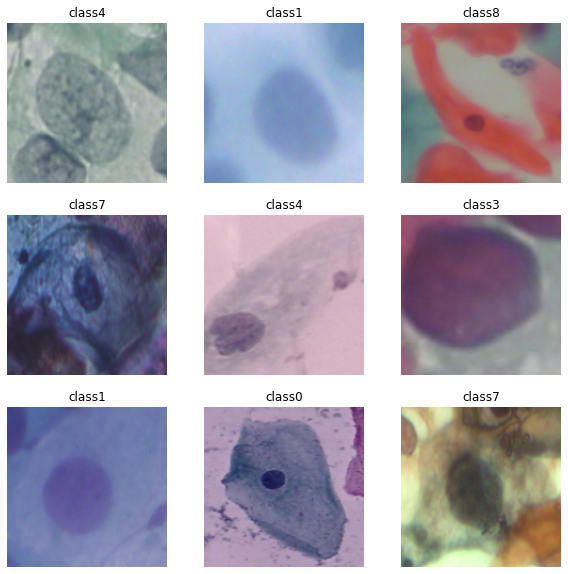

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

We will train the model using the dataset by passing them to model.fit. In order to understand this structure, lets see the batches of images.

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


The image_batch is a tensor of the shape (32, 150, 150, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

### **Configure the dataset for performance**

We can use buffered prefetching in order to overlap data preprocessing and model execution while training.


In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Now, we are going to standarize the data. The RGB channel values are in the [0, 255] range. This is not good for a neural network. Here, we will standardize values to be in the [0, 1] range by using a Rescaling layer.

In [22]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

We are going to apply this this layer in the dataset by calling map:

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.15545098 0.65882355


###**Model definition ANN**

Here we continue with the definition of the model. We implement a Sequential Network with the folowing characteristics.

*   Rescaling layer
*   Convolutional layer and maxpool layer 1 with Relu activation (16)
*   Convolutional layer and maxpool layer 2 with Relu activation (32)
*   Convolutional layer and maxpool layer 3 with Relu activation (64)
*   Flattens layer - the resulting image array to 1D array
*   Hidden layer with 128 neurons and Rectified Linear Unit activation function 
*   Output layer with the number of classes in this case 9

In [26]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150, 150, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [30]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
74/74 [==============================] - 35s 478ms/step - loss: 1.4176 - accuracy: 0.5083 - val_loss: 1.1629 - val_accuracy: 0.5839
Epoch 2/20
74/74 [==============================] - 35s 471ms/step - loss: 1.1107 - accuracy: 0.6029 - val_loss: 0.9753 - val_accuracy: 0.6764
Epoch 3/20
74/74 [==============================] - 35s 471ms/step - loss: 0.9343 - accuracy: 0.6705 - val_loss: 1.0808 - val_accuracy: 0.6301
Epoch 4/20
74/74 [==============================] - 35s 471ms/step - loss: 0.8352 - accuracy: 0.7159 - val_loss: 1.0657 - val_accuracy: 0.6438
Epoch 5/20
74/74 [==============================] - 35s 472ms/step - loss: 0.7930 - accuracy: 0.7279 - val_loss: 0.8297 - val_accuracy: 0.7363
Epoch 6/20
74/74 [==============================] - 35s 478ms/step - loss: 0.7216 - accuracy: 0.7493 - val_loss: 0.7717 - val_accuracy: 0.7671
Epoch 7/20
74/74 [==============================] - 35s 474ms/step - loss: 0.6144 - accuracy: 0.8006 - val_loss: 0.6813 - val_accuracy: 0.7911

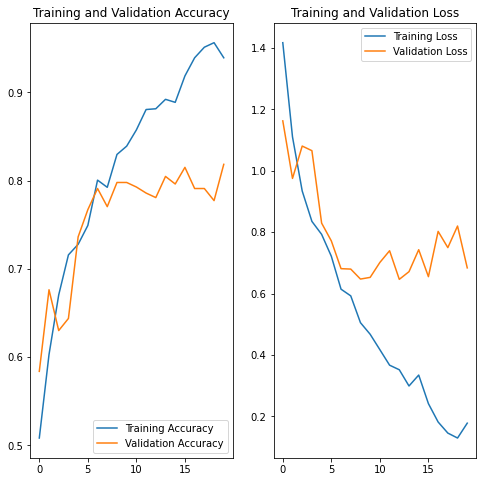

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(150, 
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

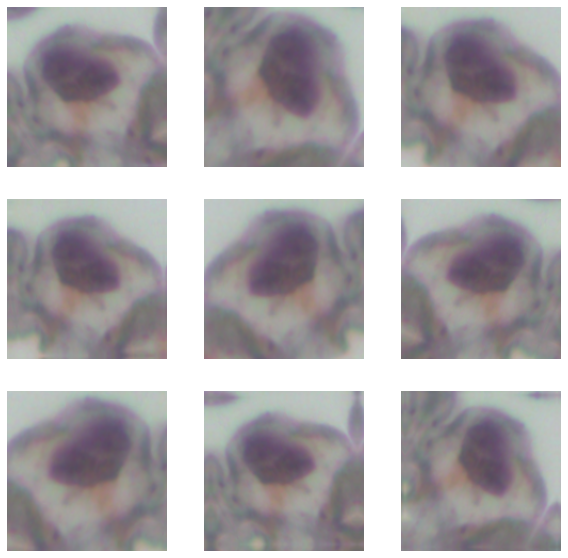

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [34]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)       

In [37]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
74/74 [==============================] - 43s 574ms/step - loss: 1.6234 - accuracy: 0.4083 - val_loss: 1.7058 - val_accuracy: 0.3630
Epoch 2/15
74/74 [==============================] - 42s 569ms/step - loss: 1.3562 - accuracy: 0.5132 - val_loss: 1.0975 - val_accuracy: 0.6404
Epoch 3/15
74/74 [==============================] - 42s 565ms/step - loss: 1.0747 - accuracy: 0.6348 - val_loss: 1.1895 - val_accuracy: 0.5668
Epoch 4/15
74/74 [==============================] - 42s 564ms/step - loss: 0.9978 - accuracy: 0.6560 - val_loss: 0.9257 - val_accuracy: 0.7072
Epoch 5/15
74/74 [==============================] - 42s 562ms/step - loss: 0.8665 - accuracy: 0.7040 - val_loss: 0.8980 - val_accuracy: 0.7021
Epoch 6/15
74/74 [==============================] - 42s 563ms/step - loss: 0.8061 - accuracy: 0.7259 - val_loss: 0.8058 - val_accuracy: 0.7432
Epoch 7/15
74/74 [==============================] - 41s 559ms/step - loss: 0.7974 - accuracy: 0.7158 - val_loss: 0.8575 - val_accuracy: 0.7209

In [38]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    #plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)

    return val

In [39]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("/content/data/Test") if isfile(join("/content/data/Test", f))]
onlyfiles
files=[]

for file in onlyfiles:
  if '_' not in file:
    files.append(file)

In [40]:
from tensorflow.keras.preprocessing import image

In [43]:
import csv
Id_test = []
predict_test=[]

with open('/content/data/SampleSubmission.csv', 'r') as csvfile:
  filereader = csv.reader(csvfile, delimiter=',')
  for row in filereader:
    Id_test.append(row[0])
    predict_test.append(row[1])

Id_paths=[]
for id in Id_test:
  new_id=id+".bmp"
  Id_paths.append(new_id)

In [44]:
prediction=[]
for image_cell in Id_paths:
  if image_cell != "ID.bmp":
      path=str("/content/data/Test/"+image_cell)
      value=predictImage(path)
      prediction.append(value.astype(int))

[[ 5.786813    1.2801772  -4.578802   -3.674024   -3.8312736  -6.1644387
  -1.2896206   0.44062245  7.884904  ]]
[[ 1.0229751  -4.3896866  -0.31565446 -0.22373658  0.988358    0.2004266
   1.1062874   6.9440856   3.1090896 ]]
[[ 4.9917583 -2.0248697 -5.204738  -2.5393786 -4.6119018 -8.35665
  -2.7002254  7.4764504  7.9073524]]
[[-1.9639302e+00 -5.2432623e+00  1.0285883e-01  8.4282190e-01
   1.1775377e+00 -5.2895434e-03  1.5453717e+00  7.1929088e+00
   4.8127613e+00]]
[[ 8.557405  -1.6033522 -3.4174879 -1.8212641 -0.1285293 -4.2580748
  -1.3374971  3.4101543 -1.2901001]]
[[ 4.148634  -7.737741  -2.055564  -6.2286158 -5.9599705 -9.178416
   5.699595  13.494162  16.292267 ]]
[[ 6.271019  -1.660869   2.3612988 -1.0077527  5.250529   3.3593566
   0.9230298  1.8133941 -5.6041417]]
[[  1.6570736  -7.7011633  -4.496959   -5.993133   -6.287689  -11.709592
    3.320729    9.22505    16.890406 ]]
[[ 6.415943  -1.0411237  2.9590173  1.7798238  3.0794027  1.5803212
   1.3871105  1.6023624 -5.667416

In [45]:
prediction2 = prediction
aa = prediction[2]
posax = np.where(aa == np.amax(aa))
prediction2[2] = np.zeros(len(prediction2[0]))

#prediction2[2][posax] = 1

print(prediction[2])
print(prediction2[2])

[0.]
[0.]


In [46]:
final_prediction=[]
for value_predicted in prediction:
  class_number=np.argmax(value_predicted)

  if class_number == 0:
    final_prediction.append(0)
  elif class_number == 1:
    final_prediction.append(1)
  elif class_number == 2:
    final_prediction.append(2)
  elif class_number == 3:
    final_prediction.append(3)
  elif class_number == 4:
    final_prediction.append(4)
  elif class_number == 5:
    final_prediction.append(5)
  elif class_number == 6:
    final_prediction.append(6)
  elif class_number == 7:
    final_prediction.append(7)
  elif class_number == 8:
    final_prediction.append(8)
  else:
    final_prediction.append(0)

In [47]:
with open('/content/data/SampleSubmission.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)      
    write.writerow(final_prediction)

###**Model definition CNN**

In [48]:
RANDOM_SEED = 1
IMG_SIZE = (150, 150) # size of vgg16 input
IMG_PATH = "/content/TrainData"
print(os.listdir(IMG_PATH))

['class4', 'class6', 'class5', 'class0', 'class7', 'class8', 'class3', 'class2', 'class1']


In [55]:
vgg16_weight_path = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False, # load model without output layer
    input_shape=IMG_SIZE + (3,)
)

# We define the model
model = tf.keras.models.Sequential()
model.add(base_model)   # We add the VGG16 model
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Sigmoid for binary classification

model.layers[0].trainable = False


model.compile( # Same loss, metrics and optimizer we used before.
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 8193      
Total params: 14,722,881
Trainable params: 8,193
Non-trainable params: 14,714,688
_________________________________________________________________


In [57]:
EPOCHS = 25
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    mode='max',
    patience=6
)

history = model.fit_generator(
    train_ds,
    steps_per_epoch=50,
    epochs=EPOCHS,
    validation_data=val_ds,
    validation_steps=25,
    callbacks=[early_stopping]
)

print("Training Done")
model.save("model.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
50/50 [==============================] - 349s 7s/step - loss: -1203.2817 - accuracy: 0.1925 - val_loss: -1786.3102 - val_accuracy: 0.1798
Epoch 2/25
50/50 [==============================] - 125s 2s/step - loss: -2158.8560 - accuracy: 0.1875
Training Done
